Michael Uftring   
Indiana University   
Network Science, Spring 2018   
Week#8 Assignment - Link Communities   

# Link communities
For this assignment we will take a look at link communities and how they differ from node communities. In order to do this we will use the algorithm discussed in the reading ("Link communities reveal multiscale complexity in networks") and link community video from canvas.

A small python module has been prepared that will allow you to use the link community algorithm with Anaconda and Python 3.5. To install the module you want to open a terminal or shell and use:

```
pip install git+https://github.com/Nathaniel-Rodriguez/linkcom.git
```

This will install the package locally in your Anaconda site-packages directory (the same place where the `conda` command would install new packages). Make sure you have [git](https://git-scm.com/) installed first. If you are using Windows you will need to use the Anaconda command prompt when using pip, so that it adds the package to Anaconda. If you have trouble installing the package you can just unpack the zip file from the [github repository](https://github.com/Nathaniel-Rodriguez/linkcom/tree/master/linkcom) and put the linkcom folder in your working directory.

To use the package you can do:

In [3]:
import linkcom

The code has been adapted so that it will work with networkx graphs. The link communities algorithm requires simple undirected graphs to use. This means there can't be any self-loops or parallel edges. However, you can use weighted graphs.

In [4]:
# First lets import networkx
import networkx as nx

# And generate a new graph
my_graph = nx.erdos_renyi_graph(100, 0.1)

# We need to make sure this is a graph of type Graph
print(type(my_graph).__name__)

Graph


If the graph you load in isn't of type Graph (it maybe a Multigraph or DiGraph), it is easy to convert it to one:

In [5]:
my_graph = nx.Graph(my_graph)

## Using linkcom
Now lets call the `cluster` method in `linkcom` to cluster the links of the graph. The `cluster` method takes several optional arguments:

```
linkcom.cluster(nx_graph, threshold=None, is_weighted=False, weight_key='weight', dendro_flag=False, to_file=False, basename="clustering", delimiter='\t')
```

`Threshold`: sets the cut-off for the dendrogram.

`is_weighted`: can be `True` or `False` depending upon whether the graph has weights or not. Set this to `True` if the graph is weighted.

`weight_key`: specifies what attribute the edges have that has weight values. In networkx it is convention that this key be set to `weight`. Most functions in networkx will assume this is the key. This is also the default value for the cluster method.

`dendro_flag`: specifies whether to return the dendrogram (only applicable if the graph is unweighted and no threshold is given).

`to_file`: specifies whether to write the outputs to file. Several files will be written and given names based on `basename` with elements separated by `delimiter`. 

These outputs will be written to file:

```
Three text files with extensions .edge2comm.txt, .comm2edges.txt,
and .comm2nodes.txt store the communities.

edge2comm, an edge on each line followed by the community
id (cid) of the edge's link comm:
node_i <delimiter> node_j <delimiter> cid <newline>

comm2edges, a list of edges representing one community per line:
cid <delimiter> ni,nj <delimiter> nx,ny [...] <newline>

comm2nodes, a list of nodes representing one community per line:
cid <delimiter> ni <delimiter> nj [...] <newline>

The output filename contains the threshold at which the dendrogram
was cut, if applicable, or the threshold where the maximum
partition density was found, and the value of the partition 
density.

If no threshold was given to cut the dendrogram, a file ending with
'_thr_D.txt' is generated, containing the partition density as a
function of clustering threshold.

If the dendrogram option was given, two files are generated. One with
'.cid2edge.txt' records the id of each edge and the other one with
'.linkage.txt' stores the linkage structure of the hierarchical 
clustering. In the linkage file, the edge in the first column is 
merged with the one in the second at the similarity value in the 
third column.
```

The cluster method will return a tuple with different elements:

    If no threshold is given, then a tuple is returned with: (dict) dictionary with keys=edges and values=community membership, (float) best similarity, (float) best partition density, (list) partition density list.

    If dendro_flag is given (only applicable if no threshold), then a tuple is returned with: (dict) dictionary with keys=edges and values=community membership, (float) best similarity, (float) best partition density, (list) partition density list, (dict) keys=edges and values=community membership for original, (list) dendrogram.

    If threshold is given a tuple is returned with: (dict) dictionary with keys=edges and values=community membership, partition density at threshold.

You will mostly just be interested in using the dictionary which contains the community assignment data, which is always the first element of the tuple. Lets do a short example:

In [6]:
e2c, S, D, Dlist = linkcom.cluster(my_graph)

clustering...
computing similarities...
# D_max = 0.104996
# S_max = 0.192308


If we print `e2c` we will see that each edge has a community membership:

In [7]:
print(e2c)

{(25, 82): 40, (6, 28): 1, (36, 68): 2, (2, 84): 3, (6, 54): 4, (73, 82): 43, (42, 62): 337, (55, 80): 7, (40, 66): 268, (43, 63): 9, (30, 66): 268, (7, 68): 11, (42, 88): 12, (55, 78): 13, (6, 98): 4, (1, 28): 15, (65, 96): 205, (33, 95): 17, (71, 78): 18, (22, 48): 19, (56, 58): 20, (23, 53): 142, (8, 38): 22, (48, 77): 23, (2, 73): 24, (7, 44): 398, (13, 89): 276, (6, 67): 268, (12, 50): 28, (18, 62): 254, (50, 56): 30, (2, 12): 31, (46, 52): 32, (3, 17): 33, (68, 97): 34, (1, 33): 35, (45, 97): 36, (58, 59): 37, (7, 15): 448, (32, 58): 39, (39, 82): 40, (4, 48): 41, (12, 41): 42, (49, 82): 43, (65, 88): 12, (18, 57): 45, (77, 88): 200, (47, 99): 267, (16, 66): 268, (20, 71): 35, (58, 83): 50, (24, 40): 202, (14, 95): 276, (70, 72): 424, (0, 81): 54, (74, 97): 366, (13, 37): 126, (31, 79): 57, (65, 81): 58, (18, 48): 111, (24, 99): 267, (55, 85): 61, (12, 62): 62, (10, 26): 63, (31, 85): 124, (19, 58): 65, (23, 64): 448, (21, 26): 276, (82, 99): 40, (37, 80): 126, (36, 44): 398, (54

Since this is a random graph, we expect there not to be any meaningful communities, and indeed they are all labelled `56` (the community ID), so there doesn't appear to be any link communities in the graph.

We can now readily take our results and put them back into our graph so that it can be saved and viewed in Gephi. We can do this using the [`set_edge_attributes`](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html?highlight=set_edge_attributes#networkx.classes.function.set_edge_attributes) function in networkx. It works just like the `set_node_attributes` function from previuos assignments, but with edges instead:

In [8]:
# Put the link communities into the graph
# Note this function's syntax depends on the networkx version.
# If you use networkx 1.9 and below this line should be
# nx.set_edge_attributes(my_graph, "linkcom", e2c)
nx.set_edge_attributes(my_graph, e2c, "linkcom")

# Save the graph to file
nx.write_gexf(my_graph, "my_graph.gexf")

TypeError: unhashable type: 'dict'

In [9]:
nx.set_edge_attributes(my_graph, "linkcom", e2c)

In [10]:
my_graph[0]

{9: {'linkcom': 86},
 18: {'linkcom': 293},
 25: {'linkcom': 188},
 27: {'linkcom': 270},
 35: {'linkcom': 232},
 81: {'linkcom': 54},
 83: {'linkcom': 132},
 85: {'linkcom': 197},
 94: {'linkcom': 177}}

In [11]:
# Save the graph to file
nx.write_gexf(my_graph, "my_graph.gexf")

Now if we were to open the graph in Gephi we should be able to use the link communities to color the graph edges. In Gephi you may need to click the little attribute type button so that edge attributes are set to [ranked rather than numeric](https://gephi.org/tutorials/gephi-tutorial-quick_start.pdf). This is because we want to color the edges according to their membership and not with a gradient. Additionally, in order to keep the edge colors when saving the graph you will need to make sure the edge color in the Preview tab is set to `original`. Lastly, since you will be looking at link communities (which determine the node membership in link clustering) it will be helpful to increase the size of the edges in Gephi so the colors are more visible and so you can detect nodes that belong to multiple communities.

## The network science collaboration graph
You will be using the NetSci collaboration graph for your assignment. The nodes of the graph are people and links are formed between people who co-author a scientific paper together in network science. You can download it from [here](http://vlado.fmf.uni-lj.si/pub/networks/data/collab/netscience.htm). Make sure to read the graph description on that page. The graph has ~1500 nodes and is partly disconnected. If you have difficulty working with the full graph or trouble loading it into Gephi, you can use the largest connected component (which only has about 350 nodes). The largest connected component of a graph can be returned from networkx using:

```
largest_component=max(nx.connected_component_subgraphs(my_graph), key=len)
```

Most of the interesting stuff is happening around this component anyway. So you don't lose much except for the scientists and groups that decided to work alone.

Follow these steps for the assignment:

1. Load the Netsci graph and run the link communities clustering algorithm on it.
2. Save the link communities to the graph and save the graph to file.
3. In Gephi choose a good layout for the graph.
4. Run the modularity command to generate communities for the nodes.
5. Color the edges according to the link communities and the nodes according to the communities found by Gephi. Remember to take care in choosing the resolution parameter.
6. How well does link clustering do at detecting community structure? How well does Gephi's node modularity do at detecting community structure? What do you think the communities represent?
7. What are the similarities and differences between the communities detected by either algorithm?
8. Which authors have a prominent position in multiple communities? What do you think these author's roles are?
9. What other features do you notice about the graph that are captured with overlaping communities?
10. Save your visualization to file.
11. Once complete, submit a PDF document to Canvas that contains your responses and your graph visualization (since this is a larger graph feel free to crop the figure so that it only includes parts relevant to your responses).

## Answers

Collaboration network in science of networks   
*M.E.J. Newman, Finding community structure in networks using the eigenvectors of matrices, Preprint physics/0605087 (2006).*   
http://vlado.fmf.uni-lj.si/pub/networks/data/collab/netscience.htm

#### 1. Load the Netsci graph and run the link communities clustering algorithm on it

In [12]:
graph = nx.read_pajek("netsience.net")

In [13]:
print(nx.info(graph))

Name: 
Type: MultiGraph
Number of nodes: 1589
Number of edges: 2742
Average degree:   3.4512


In [14]:
graph = nx.Graph(graph)

In [15]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 1589
Number of edges: 2742
Average degree:   3.4512


In [16]:
e2c, S, D, Dlist = linkcom.cluster(graph)

clustering...
computing similarities...
# D_max = 0.693791
# S_max = 0.368421


#### 2. Save the link communities to the graph and save the graph to file.

In [17]:
nx.set_edge_attributes(graph, "linkcom", e2c)

In [18]:
nx.write_gexf(graph, "network-science-collaboration-network.gexf")

#### 3. In Gephi choose a good layout for the graph.

**Layout**
- *OpenOrd*
- default settings

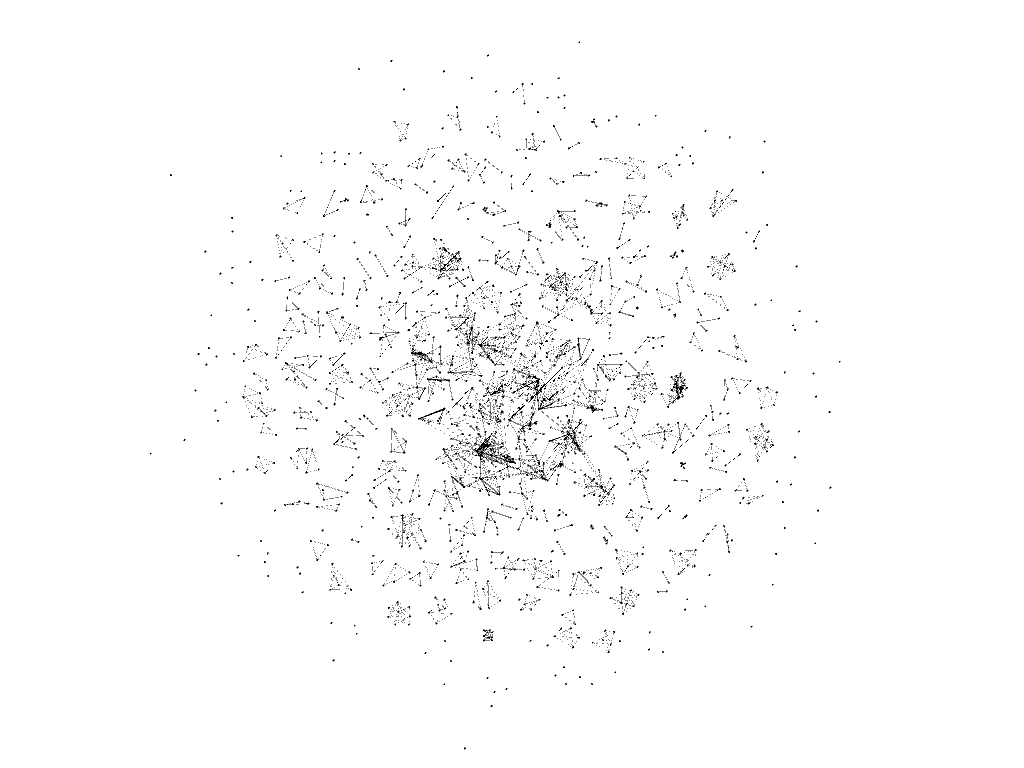

In [19]:
from IPython.display import Image
Image(filename="screenshot_100616.png")

#### 4. Run the modularity command to generate communities for the nodes.

Running **Modularity** with the default *Resolution* produced 406 communities. The objective is to try to reduce the number of communities to something more "manageable," so we try again with increasing *Resolution* values. Running with 10, 100, and 1000 all produced about the same result: the smallest number of communities found was 396. This is probably the best result we can expect given that there are a lot of nodes with very small degree (4 or below, as observed in the Degree Report), and from the visualization (above) we can see many subgraphs disconnected from what must be the largest connected component.

*Modularity Report*

Parameters:
- Randomize: On
- Use edge weights: On
- Resolution: 1000.0

Results:
- Modularity: 0.825
- Modularity with resolution: 999.825
- Number of Communities: 396

The Modularity Class partitioning shows that there are five classes with a portion greater than 1.0%, and an additional three when looking at portion sizes greater than 0.8%. These are the classes that receive node coloring other than gray. Note that the edges are colored by the source node, which helps to visualize the community structures (which would otherwise be very difficult to perceive with just node coloring).

|Community|% of Network|Numbner of Nodes|Color|Description / Location |
|---|---|---|---|---|
| 1 | 23.85% | 379 | purple | massive **large component** in the center |
| 2 | 3.59% | 57 | green | mostly to the left of center, some fringing on the top of the large component |
| 3 | 1.95% | 31 | light blue | above and left of center |
| 4 | 1.76% | 28 | red | above and right of center |
| 5 | 1.32% | 21 | blue-green | to the right of center |
| 6 | 0.88% | 14 | brown | above and right of center |
| 7 | 0.88% | 14 | dark blue | far above the center |
| 8 | 0.82% | 13 | pink (salmon) | below and to the left of center |

Grouping the nodes by Modularity would be very beneficial, but Gephi does not have a layout algorithm for this. A manual approach for [Clustering layout by modularity](http://parklize.blogspot.com/2014/12/gephi-clustering-layout-by-modularity.html) was considered, and experimented with on the random graph, but this network (as a whole) is too large to attempt this operation.

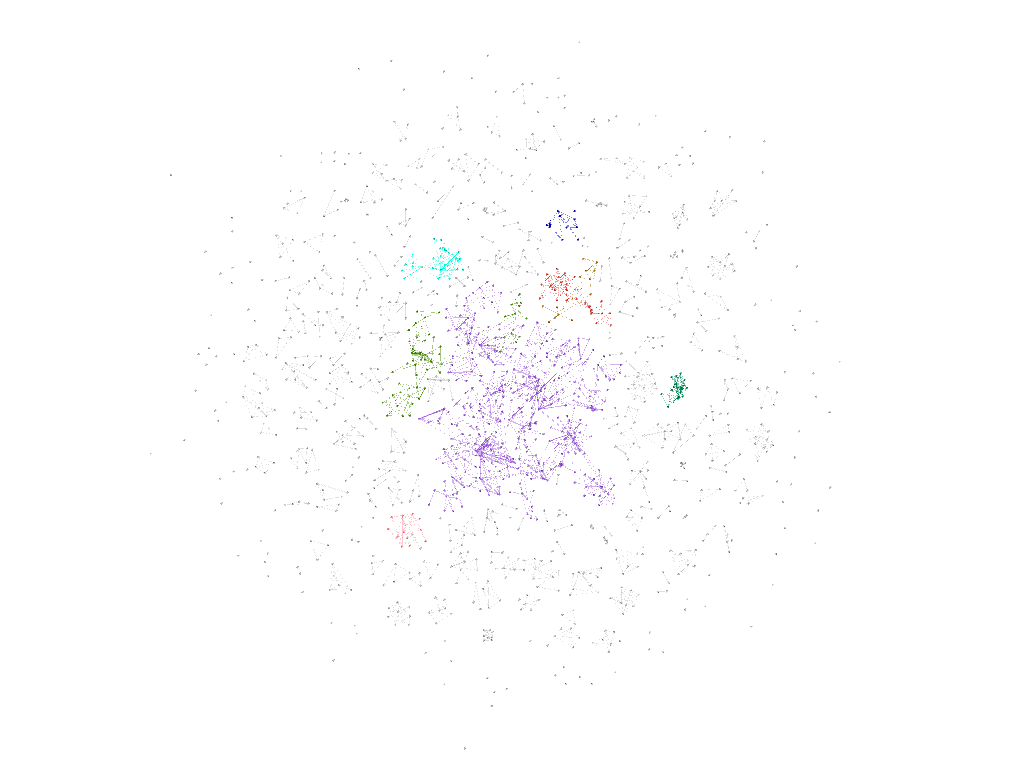

In [20]:
Image(filename="screenshot_101820.png")

#### 5. Color the edges according to the link communities and the nodes according to the communities found by Gephi. Remember to take care in choosing the resolution parameter.

The link community clustering algorithm detected 618 communities. The largest community is just 6.93% of the total network, and the remaining top 10 are all above 1.0%.

|Community|% of Network|Numbner of Nodes|Color|Description / Location |
|---|---|---|---|---|
| 1 | 6.93% | 190 | green | tightly grouped to the right of center |
| 2 | 2.26% | 62 | purple | above and slight to the right of center |
| 3 | 1.64% | 45 | red | far right |
| 4 | 1.64% | 45 | light blue | to the right and cloeser to the center |
| 5 | 1.64% | 45 | brown | far below, straight down from center |
| 6 | 1.6% | 44 | fluorescent green | below and to the right |
| 7 | 1.57% | 43 | orange | in the lower part of the center region |
| 8 | 1.31% | 36 | medium blue | to the left of center |
| 9 | 1.31% | 36 | dark blue | to the right, and above center |
| 10 | 1.28% | 35 | rust | above center, and slightly to the left |

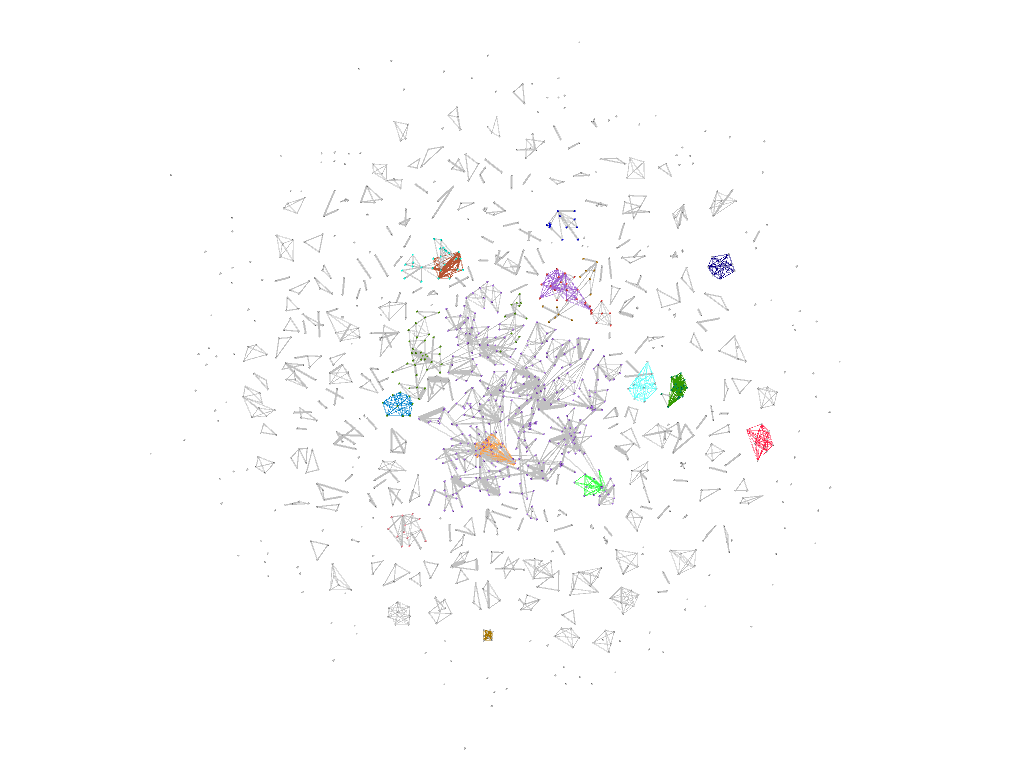

In [21]:
Image(filename="screenshot_102706.png")

#### Repeat steps 1-5, looking at just the largest component.

In [22]:
largest_component=max(nx.connected_component_subgraphs(graph), key=len)

In [23]:
print(nx.info(largest_component))

Name: 
Type: Graph
Number of nodes: 379
Number of edges: 914
Average degree:   4.8232


In [24]:
e2c, S, D, Dlist = linkcom.cluster(largest_component)

clustering...
computing similarities...
# D_max = 0.463159
# S_max = 0.416667


In [25]:
nx.set_edge_attributes(largest_component, "linkcom", e2c)

In [26]:
nx.write_gexf(largest_component, "network-science-collaboration-network-largest-component.gexf")

In Gephi choose a good layout for the graph.

Again, used *OpenOrd* with default parameters to produce the layout.

Here we see a much smaller network, with the same look of the center of the larger network. A subgraph of connected nodes, with some well-connected nodes more towards the center. 

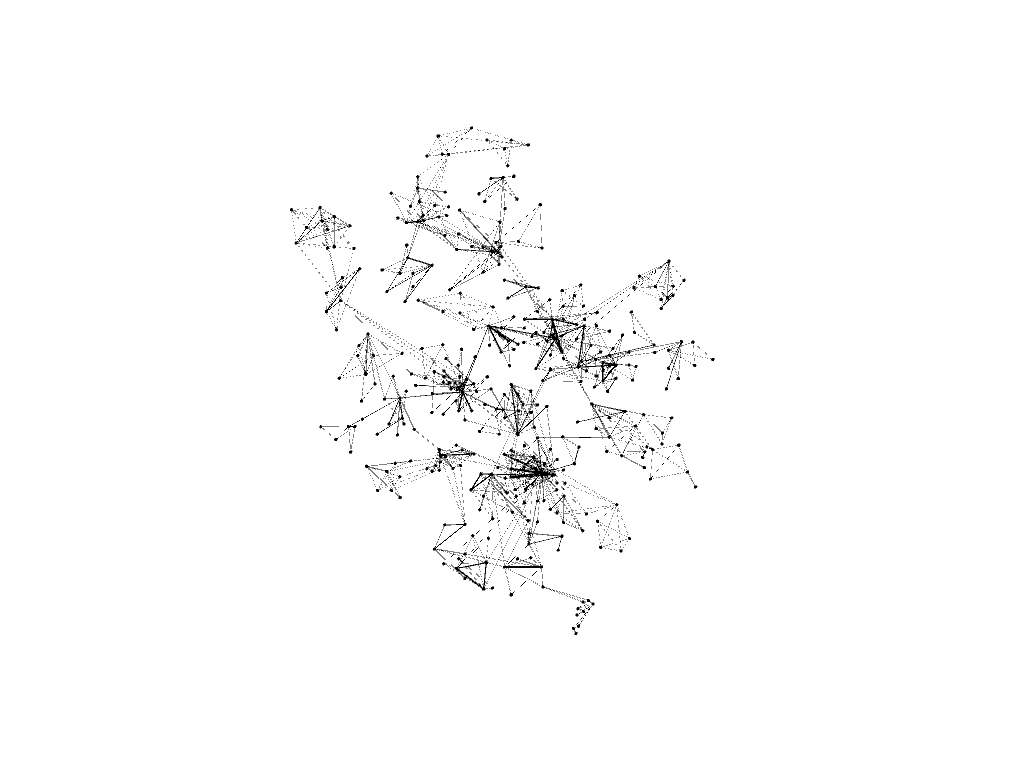

In [28]:
Image(filename="screenshot_104718.png")

Run the **Modularity** command to generate communities for the nodes.

*Modularity Report*

Parameters:
- Randomize: On
- Use edge weights: Off
- Resolution: 2.0

Results:
- Modularity: 0.827
- Modularity with resolution: 1.782
- Number of Communities: 11

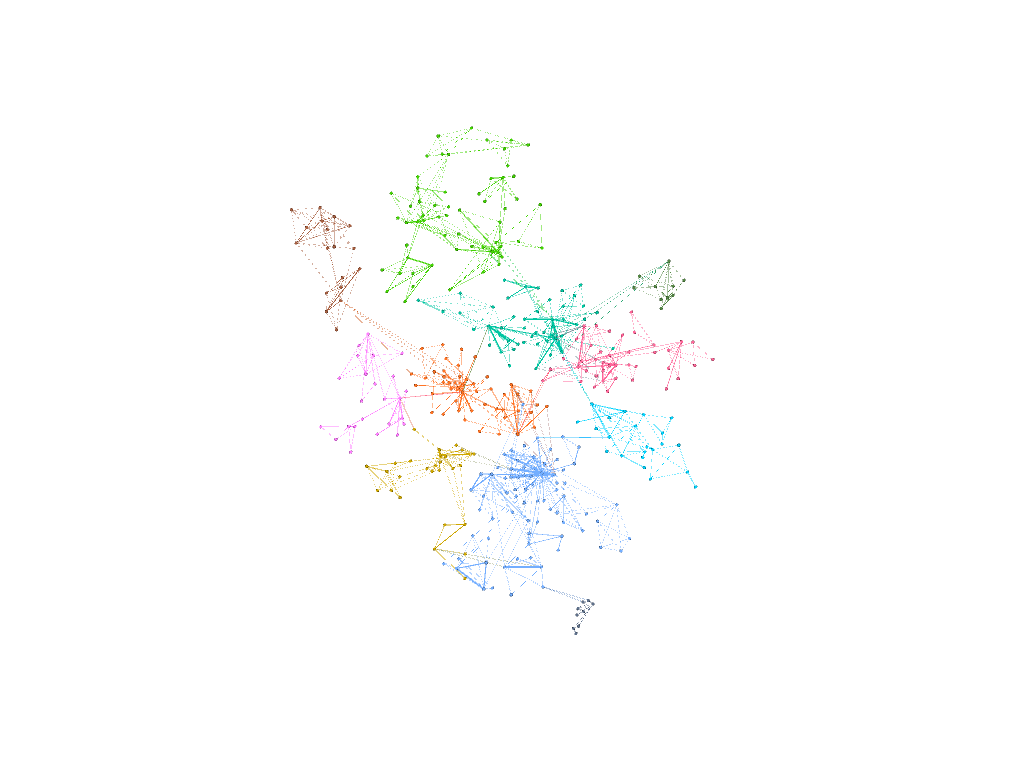

In [30]:
Image(filename="screenshot_105125.png")

Color the edges according to the link communities and the nodes according to the communities found by Gephi. 

There are 243 link communities, we will color just the top 10.


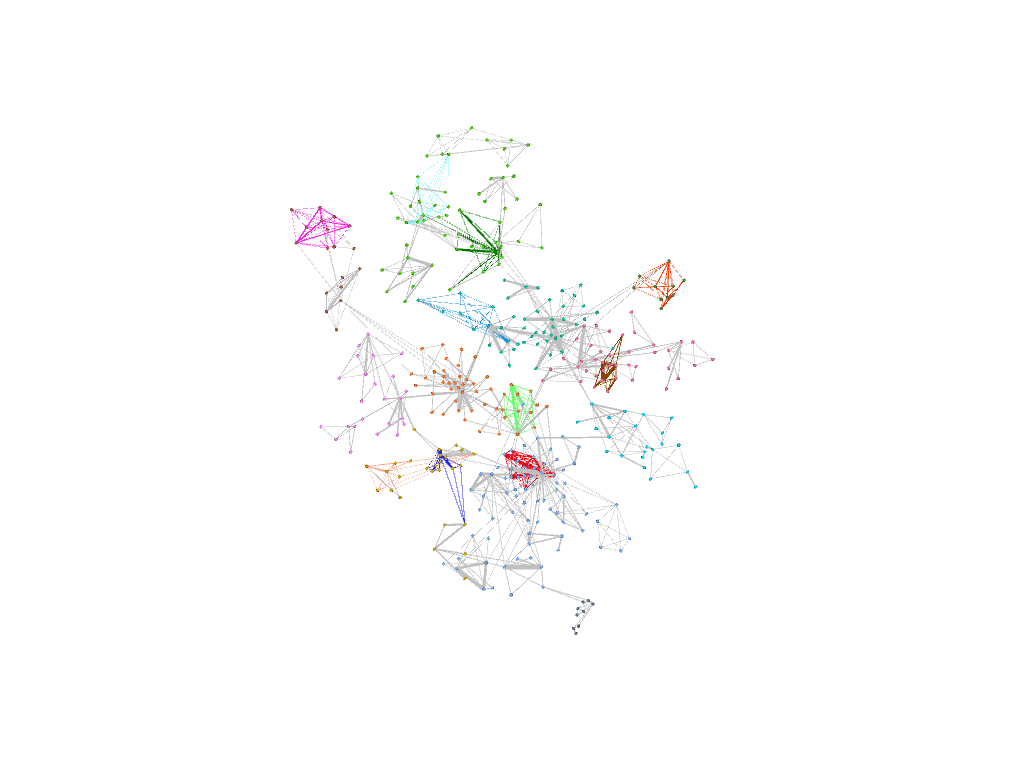

In [31]:
Image(filename="screenshot_110427.png")

#### 6. How well does link clustering do at detecting community structure? How well does Gephi's node modularity do at detecting community structure? What do you think the communities represent?

As expected, Link Clustering found many smaller groups. These communities probably represent research and publication in the same area (the same or closely related topics) either by direct collaboration (a team) or "competing" groups.

#### 7. What are the similarities and differences between the communities detected by either algorithm?

Link Clustering does a better job at finding smaller communities, which is expected. In order to detect even close to the same number of communities with Modularity, the Resolution had to be reduced to 0.001; at this point the community size was 2 or 3 members, which is not very meaningful. Visualy we can see that some of these pairs found by Modularity were in the same communities identified by Link Clustering.

#### 8. Which authors have a prominent position in multiple communities? What do you think these author's roles are?

The visualization produced (below) does not show any authors in multiple communities, which seems rather unusual.

However, looking closer at the purple and brown communities (above the center, near the top of the visualization) we find Kurths, J (purple) and Mancini, H (brown). Each have a strong relationship with others in their community - judging by the number of links, and they have a relationship with each other. Perhaps this should have been a dual-community membership for both.

#### 9. What other features do you notice about the graph that are captured with overlaping communities?

There were no overlapping communities found.

#### 10. Save your visualization to file.

Some additional tweaking of colors, node and link size, and "making it look nice" in the Preview tab produced the visualization below.

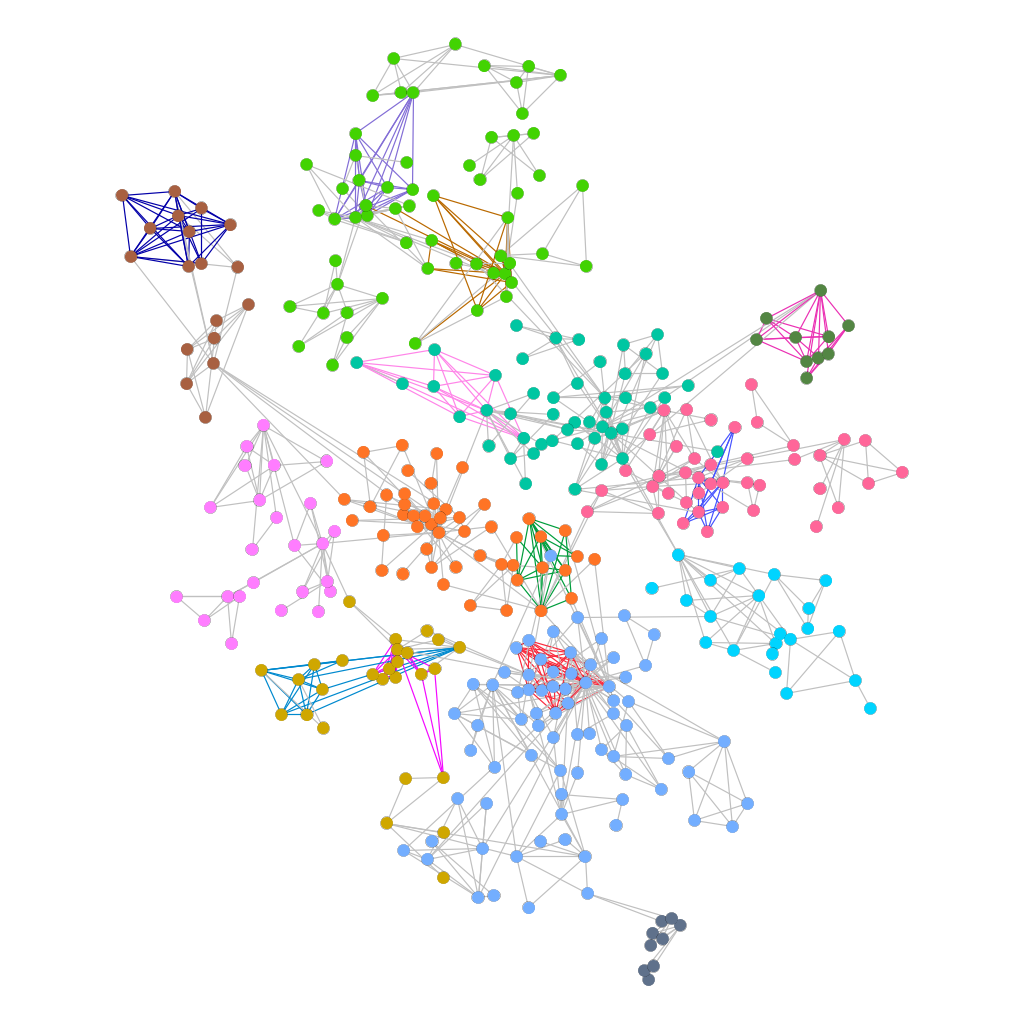

In [32]:
Image(filename="link-communities.png")

#### 11. Once complete, submit a PDF document to Canvas that contains your responses and your graph visualization (since this is a larger graph feel free to crop the figure so that it only includes parts relevant to your responses).